# MNIST Handwritten Digit Classification Dataset

The MNIST dataset contains 70000 small square 28x28 pixel grayscale images of handwritten single digits (0 to 9)   
Each image has 784 characteristics representing the intensity of one pixel, from 0 (white) to 255 (black)

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score,GridSearchCV  # RandomizedSearchCV 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold


Use the MNIST dataset provided by Scikit-learn

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### Train-Test Split 

This dataset is already split.    
The first 60000 images are for the training set and the last 10000 images for the test set

In [3]:
# values in np.array
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)    # ---> (70000, 784) (70000,)
print(type(X))

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print("\nX_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


(70000, 784) (70000,)
<class 'numpy.ndarray'>

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


### Visualize data

The plot_digit () function to display an image

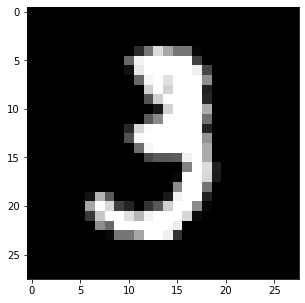

In [4]:
def plot_digit(data):
    plt.figure(figsize=(10,5))
    img = data.reshape(28, 28)
    plt.imshow(img, cmap="gray")   # greyscale, "gray_r" = inverse grayscale

    
plot_digit(X_train[10])


The plot_more_digit () function to display n images

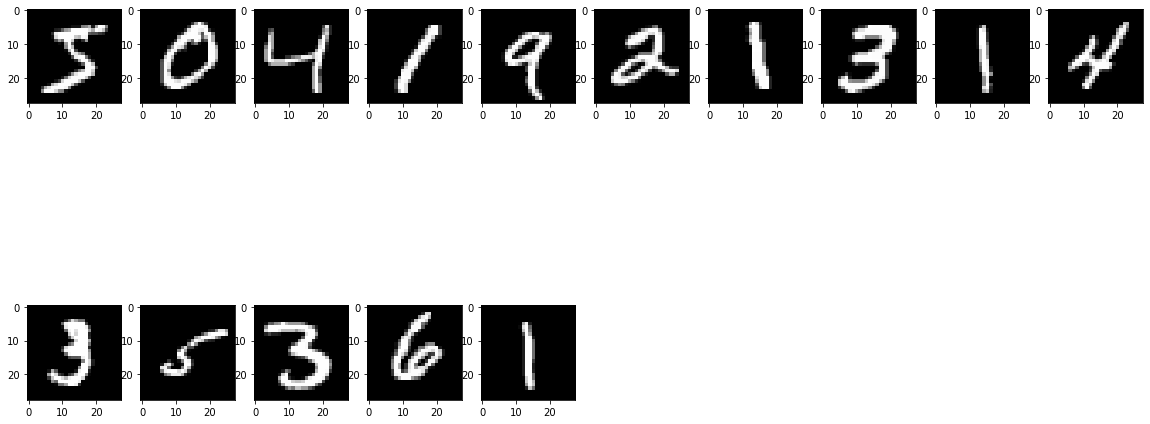

In [5]:
def plot_more_digit(data, n):
    plt.figure(figsize=(20,10))
    for i in range(n):
        plt.subplot(2, 10, i+1)    
        img = data[i].reshape(28, 28)
        plt.imshow(img, cmap="gray")

plot_more_digit(X_train, 15)



<AxesSubplot:xlabel='count'>

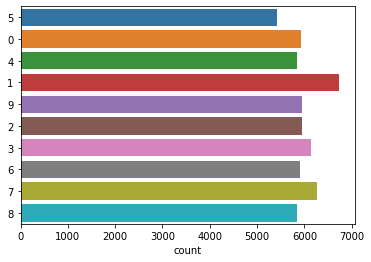

In [6]:
sns.countplot(y=y_train)

### Transform data

Standard Scaler to transform data so that its distribution has a mean value of 0 and a standard deviation of 1

In [7]:
# transform data

X_train = StandardScaler().fit_transform(X_train.astype(np.float64))


## Compare models:
- Random Forest Classifier
- KNeighborsClassifier
- DecisionTreeClassifier
- GaussianNB
- SVC
- SGDClassifier

RFC: 0.9671 (0.0041880783182743865)
KNN: 0.944 (0.0057421443923174045)
DT: 0.8707333333333332 (0.00716713176785372)
NB: 0.5347999999999999 (0.008154003788187616)
SVM: 0.9634833333333332 (0.003940142411413863)


/home/isabel/ML_book/ENV/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/isabel/ML_book/ENV/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGD: 0.898 (0.00953735346472549)


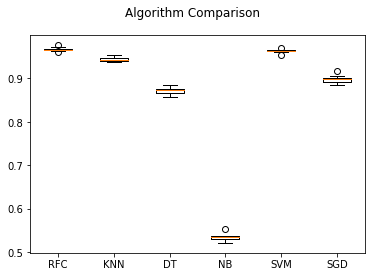

In [8]:
def compare_models(models):
    results = []
    names = []

    
    for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
        
        results.append(cv_results)
        names.append(name)
        msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
        print(msg)

        
        
    # boxplot comparision
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    
    
models = [("RFC", RandomForestClassifier()),
         ("KNN", KNeighborsClassifier()),
         ("DT", DecisionTreeClassifier()),
         ("NB", GaussianNB()),
         ("SVM", SVC()),
         ("SGD", SGDClassifier())]

compare_models(models)